<a href="https://colab.research.google.com/github/binit24/Datascience.com/blob/main/Customer_Churn_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
f = open("bigml_59c28831336c6604c800002a.csv")

In [135]:
#Reading the Dataset:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
#Checking the info:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
#cheking Duplicate columns:
df.duplicated().sum()

0

In [9]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['state', 'phone number', 'international plan', 'voice mail plan']


In [11]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].unique()))
        print('********************************************')

state:['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
********************************************
phone number:['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']
********************************************
international plan:['no' 'yes']
********************************************
voice mail plan:['yes' 'no']
********************************************


In [29]:
#Checking the value counts for every feature:
df.apply(lambda x:len(x.value_counts()))

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

                        Total Missing Value
state                                     0
account length                            0
area code                                 0
phone number                              0
international plan                        0
voice mail plan                           0
number vmail messages                     0
total day minutes                         0
total day calls                           0
total day charge                          0
total eve minutes                         0
total eve calls                           0
total eve charge                          0
total night minutes                       0
total night calls                         0
total night charge                        0
total intl minutes                        0
total intl calls                          0
total intl charge                         0
customer service calls                    0
churn                                     0


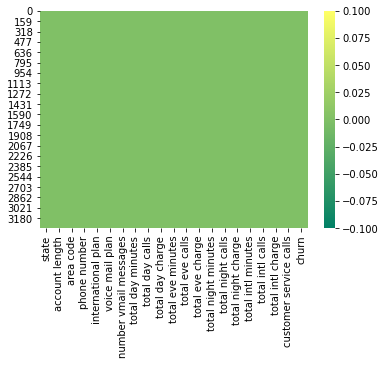

In [12]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [13]:
#No Missing Value in Dataset thats great its and balance Dataset:

In [24]:
#Lets Do some Feature Engineering:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [79]:
#Converting it into binary format:
chrun_map = {True: 1,False: 0}
df['churn'] = df['churn'].map(chrun_map)

In [26]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [80]:
#Working With othet Categorical Column and converting them into binary:
df['international plan'] = df['international plan'].map({'no':0,'yes':1})
df['voice mail plan'] = df['voice mail plan'].map({'no':0,'yes':1})

In [30]:
#checking the Columns:
columns = list(df.columns)
print(df.shape)
print(columns)

(3333, 21)
['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [31]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [32]:
#Avg total day calls is around 100.435644
#Avg total night minutes calls is around 200.872037
#Avg customer service calls 1.562856
#Ang total night charge 9.039325
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.

In [33]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable

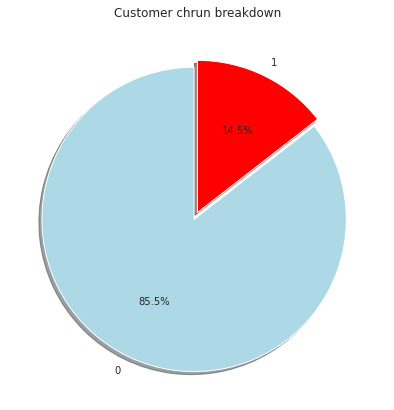

0    2850
1     483
Name: churn, dtype: int64


In [65]:
# univariate Analysis: checking customer chrun breakdown:
# Cheking Count of target variable:
from pylab import rcParams
labels = df['churn'].value_counts(sort = True).index
sizes = df['churn'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)

rcParams['figure.figsize'] = 7,7
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Customer chrun breakdown')
plt.show()
print(df['churn'].value_counts())

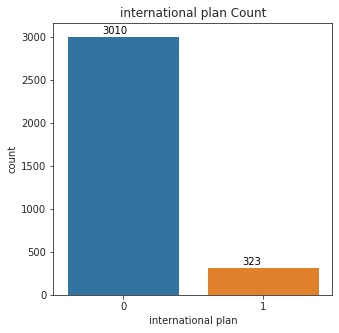

In [37]:
#Univariate Analysis:
#Checking the count of international plan:
sns.set_style('ticks')
plt.figure(figsize=(5,5))
ax = sns.countplot(df['international plan'])
plt.title("international plan Count")
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

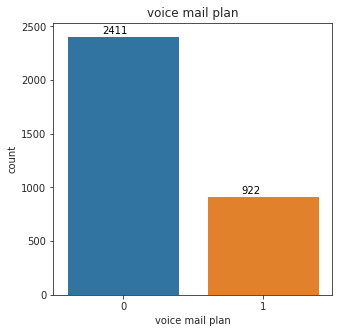

In [38]:
#Univariate Analysis:
#Checking the count of voice mail plan:
sns.set_style('ticks')
plt.figure(figsize=(5,5))
ax = sns.countplot(df['voice mail plan'])
plt.title("voice mail plan")
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

In [136]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


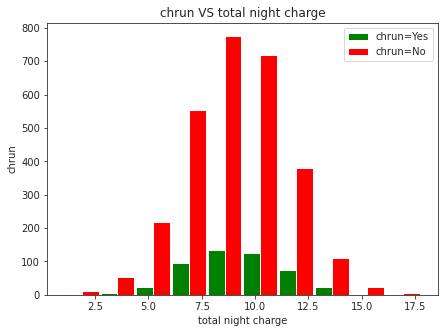

In [60]:
# Bivariate Analysis chrun VS total night charge:
chrun_yes = df.loc[df['churn'] == 1]['total night charge']
chrun_No = df.loc[df['churn'] == 0]['total night charge']
plt.figure(figsize=(7,5))
plt.xlabel("total night charge")
plt.ylabel("chrun")
plt.title("chrun VS total night charge")
plt.hist([chrun_yes, chrun_No], rwidth=0.95, color=['green','red'],label=['chrun=Yes','chrun=No'])
plt.legend()

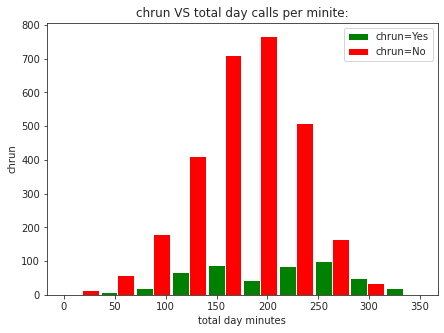

In [61]:
# Bivariate Analysis chrun VS total day calls per minite:
chrun_yes = df.loc[df['churn'] == 1]['total day minutes']
chrun_No = df.loc[df['churn'] == 0]['total day minutes']
plt.figure(figsize=(7,5))
plt.xlabel("total day minutes")
plt.ylabel("chrun")
plt.title("chrun VS total day calls per minite:")
plt.hist([chrun_yes, chrun_No], rwidth=0.95, color=['green','red'],label=['chrun=Yes','chrun=No'])
plt.legend()

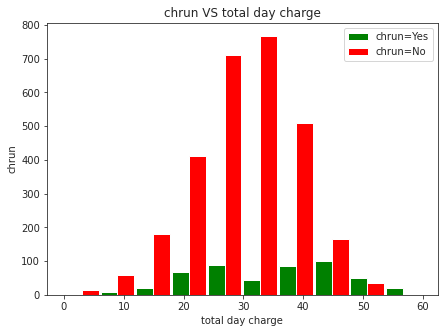

In [62]:
# Bivariate Analysis chrun VS total day charge:
chrun_yes = df.loc[df['churn'] == 1]['total day charge']
chrun_No = df.loc[df['churn'] == 0]['total day charge']
plt.figure(figsize=(7,5))
plt.xlabel("total day charge")
plt.ylabel("chrun")
plt.title("chrun VS total day charge")
plt.hist([chrun_yes, chrun_No], rwidth=0.95, color=['green','red'],label=['chrun=Yes','chrun=No'])
plt.legend()

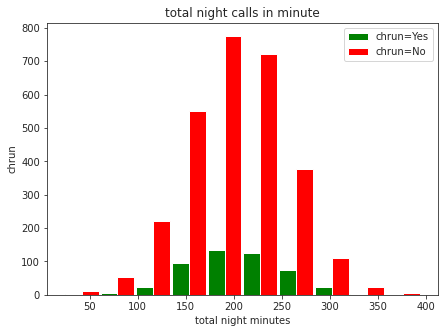

In [63]:
# Bivariate Analysis chrun VS total night calls in minute:
chrun_yes = df.loc[df['churn'] == 1]['total night minutes']
chrun_No = df.loc[df['churn'] == 0]['total night minutes']
plt.figure(figsize=(7,5))
plt.xlabel("total night minutes")
plt.ylabel("chrun")
plt.title("total night calls in minute")
plt.hist([chrun_yes, chrun_No], rwidth=0.95, color=['green','red'],label=['chrun=Yes','chrun=No'])
plt.legend()

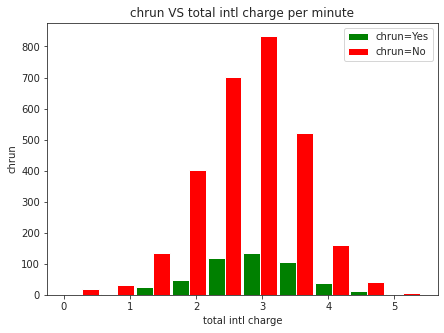

In [137]:
# Bivariate Analysis chrun VS total intl charge per minute:
chrun_yes = df.loc[df['churn'] == 1]['total intl charge']
chrun_No = df.loc[df['churn'] == 0]['total intl charge']
plt.figure(figsize=(7,5))
plt.xlabel("total intl charge")
plt.ylabel("chrun")
plt.title("chrun VS total intl charge per minute")
plt.hist([chrun_yes, chrun_No], rwidth=0.95, color=['green','red'],label=['chrun=Yes','chrun=No'])
plt.legend()

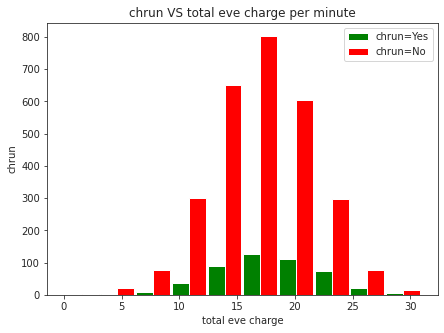

In [138]:
# Bivariate Analysis chrun VS total eve charge per minute:
chrun_yes = df.loc[df['churn'] == 1]['total eve charge']
chrun_No = df.loc[df['churn'] == 0]['total eve charge']
plt.figure(figsize=(7,5))
plt.xlabel("total eve charge")
plt.ylabel("chrun")
plt.title("chrun VS total eve charge per minute")
plt.hist([chrun_yes, chrun_No], rwidth=0.95, color=['green','red'],label=['chrun=Yes','chrun=No'])
plt.legend()

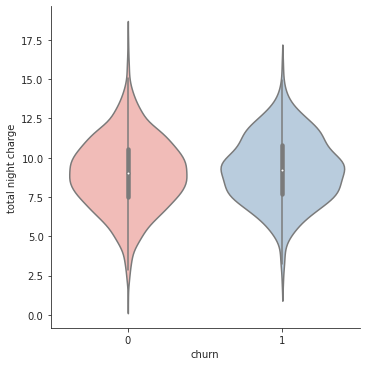

In [68]:
#Bivariate Analysis:
# Create a Volin Plot showing how total night charges relate to Churn:
g = sns.factorplot(x="churn", y = "total night charge",data = df, kind="violin", palette = "Pastel1")

In [81]:
#Dropping Phone and state column:
df.drop(columns=['phone number','state'],axis=1,inplace=True)

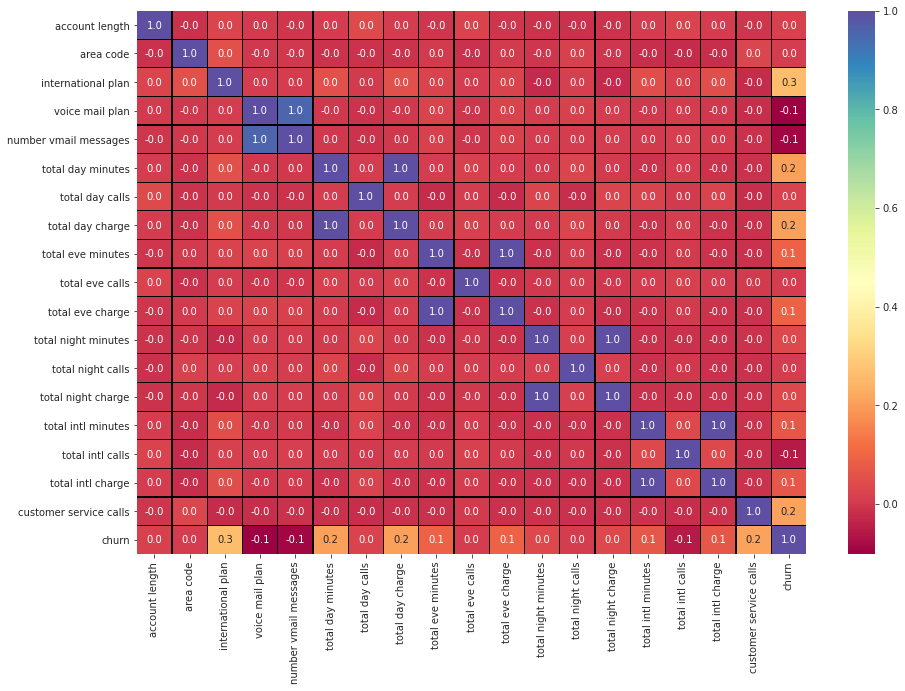

In [72]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [73]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
# so as these features are highly corelated with each other they can behave as duplicate feature.

Text(0.5, 1.0, 'corelation with target variable')

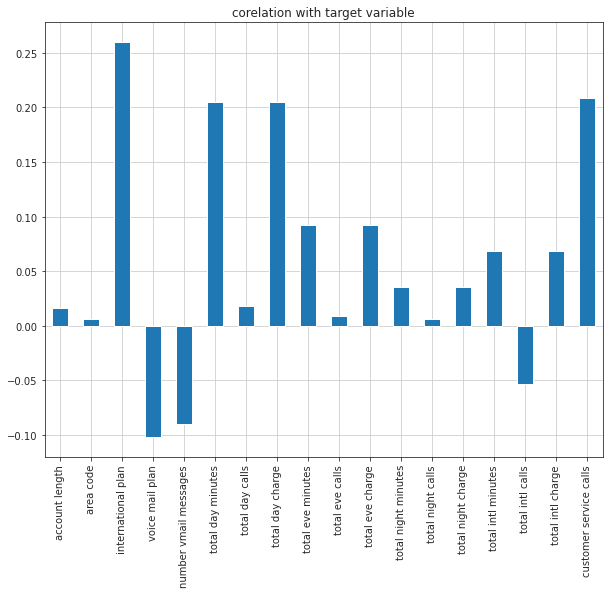

In [75]:
#corelation with target column:
plt.figure(figsize=(10,8))
df.drop('churn',axis=1).corrwith(df['churn']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [82]:
#Using head function to read top 5 rows in dataset:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [83]:
#Using Min Max Scaler: Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge']
df_minmax_transform = pd.DataFrame(data = df)
df_minmax_transform[numerical] = scaler.fit_transform(df_minmax_transform[numerical])
df_minmax_transform.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,1,0
1,107,415,0,1,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,1,0
2,137,415,0,0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0,0
3,84,408,1,0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,2,0
4,75,415,1,0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,3,0


In [84]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not and if yes lets normalize them:
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (3333, 19)
After removal of outliers: (2860, 19)


In [85]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('churn',axis=1)
y = df_final['churn']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (2860, 18)
shape of y is (2860,)


In [86]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
#From Above corelation digram we know some of the features are highly corelated lets normalize them:
corrmat = X_train.corr()

In [88]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#so as these features are highly corelated with each other they can behave as duplicate feature.
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [89]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

5

In [90]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr =  X_test.drop(labels=corr_features,axis=1)

In [91]:
X_train_uncorr.shape, X_test_uncorr.shape

((2288, 13), (572, 13))

In [92]:
#Redefining traing and testing data:
X_train_uncorr, X_test_uncorr, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [93]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [98]:
model = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train_uncorr,y_train)
    print("Score of",m, "is:",m.score(X_train_uncorr,y_train))
    y_predict= m.predict(X_test_uncorr)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    score = cross_val_score(m,X,y,cv=5,scoring='accuracy').mean()
    print("Cross validation is",np.mean(score)*100)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.8994755244755245
accuracy_score: 0.8951048951048951
Cross validation is 89.89510489510491
[[503   4]
 [ 56   9]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       507
           1       0.69      0.14      0.23        65

    accuracy                           0.90       572
   macro avg       0.80      0.57      0.59       572
weighted avg       0.88      0.90      0.86       572

[[503   4]
 [ 56   9]]
******************************************************************


Score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3

In [99]:
#It looks like the All Regression has a good accuracy score on the test set, but keep in mind this is just a single training/test split; we need to confirm this performance holds for other splits. In addition, we need to tune the regularization hyperparameter. 
#Fortunately, there's a way to tackle both at the same time without introducing additional bias

In [ ]:
#Lets try with Random Forest classifier and check the scores without adding any bias:

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_uncorr, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import StratifiedShuffleSplit

In [120]:
# Create Hyperparametre tuning
param_grid = {'max_depth':[3,5,10,None],'n_estimators':[10,100,200,300,400,500],'max_features':randint(1,3),'criterion':['gini','entropy'],'bootstrap':[True,False],'min_samples_leaf':randint(1,4)}

In [123]:
random_grid = RandomizedSearchCV(classifier,param_distributions= param_grid,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),scoring='f1',n_jobs=-1)
random_grid.fit(X_train_uncorr,y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2,
            train_size=None),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples...
                                        'criterion': ['gini',

In [124]:
#Fetching best parametre:
random_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 100}

accuracy_score: 0.9458041958041958
[[505   2]
 [ 29  36]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       507
           1       0.95      0.55      0.70        65

    accuracy                           0.95       572
   macro avg       0.95      0.77      0.83       572
weighted avg       0.95      0.95      0.94       572



Text(0.5, 48.29999999999998, 'Predicted label')

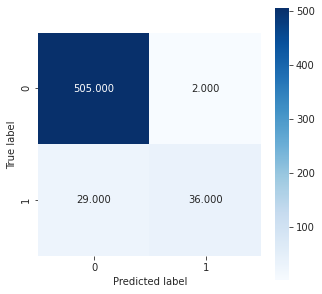

In [125]:
classifier = RandomForestClassifier(bootstrap=True,criterion='gini',max_features=2,min_samples_leaf=1,n_estimators=100)
classifier.fit(X_train_uncorr,y_train)
y_predict= classifier.predict(X_test_uncorr)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [126]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier,X,y,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),scoring='f1',n_jobs=-1)

In [127]:
scores.mean()

0.6214284691675005

In [ ]:
#Its our final model score performance:

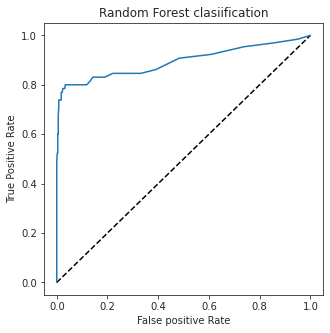

0.7749506903353057


In [132]:
#AUC and ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = classifier.predict_proba(X_test)[:,1]
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='Random Forest classification')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest clasiification')
plt.show()

auc_score = roc_auc_score(y_test,y_predict)
print(auc_score)

In [134]:
#Saving the best Model:
import joblib
joblib.dump(classifier,'classifier.obj')
classifier_from_joblib = joblib.load('classifier.obj')